In [4]:
import piplite
await piplite.install('seaborn')

In [6]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [14]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"


In [17]:
from pyodide.http import pyfetch

async def download(url, filename):
    response  = await pyfetch(url)
    if response == 200:
        with open (filename, "wb") as f:
            f.write(await response.bytes())
await download (url, "laptops.csv")
filename = "laptops.csv"


In [22]:
df = pd.read_csv(filename, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [30]:
# Single Linear Regression 
lm = LinearRegression()
lm



LinearRegression()

In [31]:
x = df[["CPU_frequency"]]
y = df[["Price"]]
lm.fit(x,y)

LinearRegression()

In [36]:
df[["CPU_frequency", "Price"]].corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


In [34]:
Yhat = lm.predict(x)
Yhat[0:5]

array([[1073.07834392],
       [1277.93263722],
       [1636.42765051],
       [1073.07834392],
       [1175.50549057]])

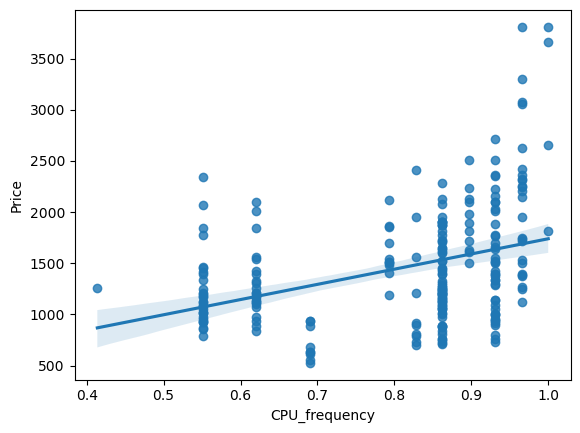

In [35]:
sns.regplot(x = df[["CPU_frequency"]], y = df[["Price"]], data = df)
plt.show()

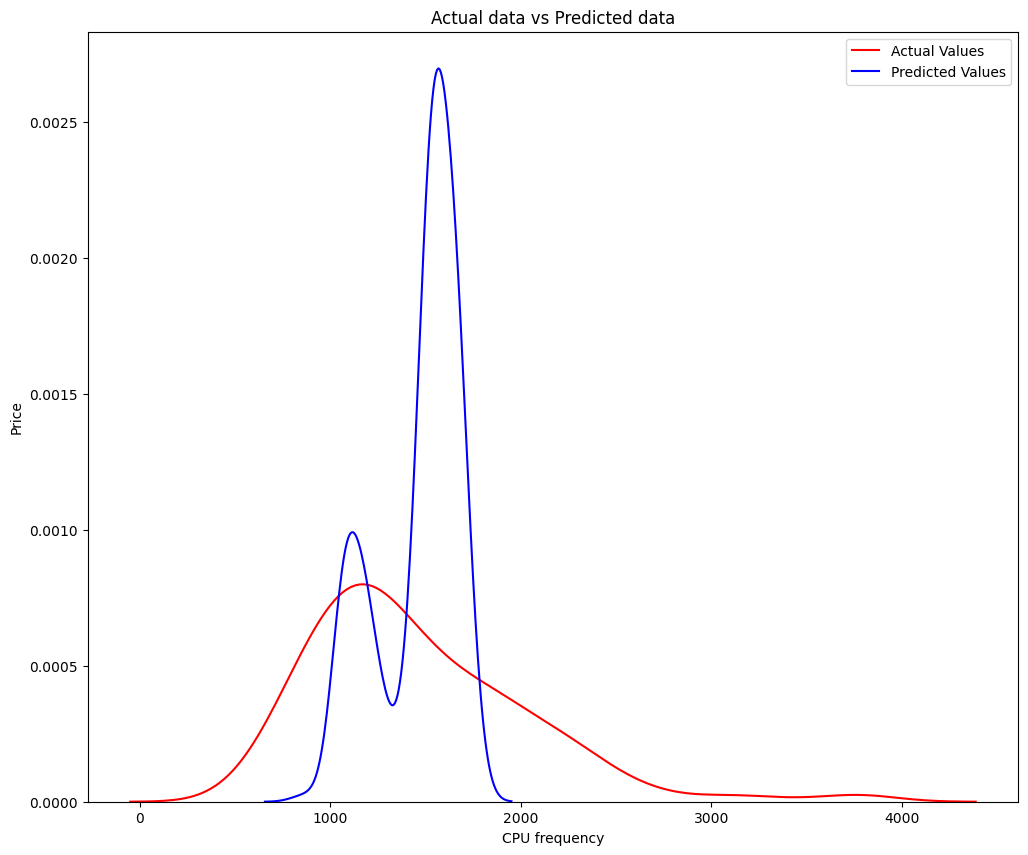

In [41]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning)
width = 12 
height = 10
plt.figure(figsize = (width, height))
Actual_plot = sns.distplot(df["Price"], hist = False, color = "r", label = "Actual Data")
sns.distplot(Yhat, hist = False, color = "b", label= "Predicted Values", ax = Actual_plot)

plt.title("Actual data vs Predicted data")
plt.xlabel("CPU frequency")
plt.ylabel("Price")
plt.legend(["Actual Values", "Predicted Values"])
plt.show()
plt.close()


In [48]:
# calculate MSE and R-Squared Values for the Model 

lm.fit(x,y)
print("R-Squared Value for the Linear Regression Model is:", lm.score(x,y))

Yhat = lm.predict(x)
Yhat[0:5]

mse = mean_squared_error(y, Yhat)
print(" Mean Squared Error the Linear Regression Model is:", mse)

R-Squared Value for the Linear Regression Model is: 0.13444363210243238
 Mean Squared Error the Linear Regression Model is: 284583.44058686297


In [58]:
# Multiple Linear Regression 

lm1 = LinearRegression()
lm1
z = df[["CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Category", "GPU", "OS", "CPU_core"]]
y = df[["Price"]]
lm1.fit(z,y)
Yhat = lm1.predict(z)
Yhat[0:5]

array([[1345.51622771],
       [ 710.44905496],
       [1552.37242687],
       [1295.00681012],
       [1543.13847022]])

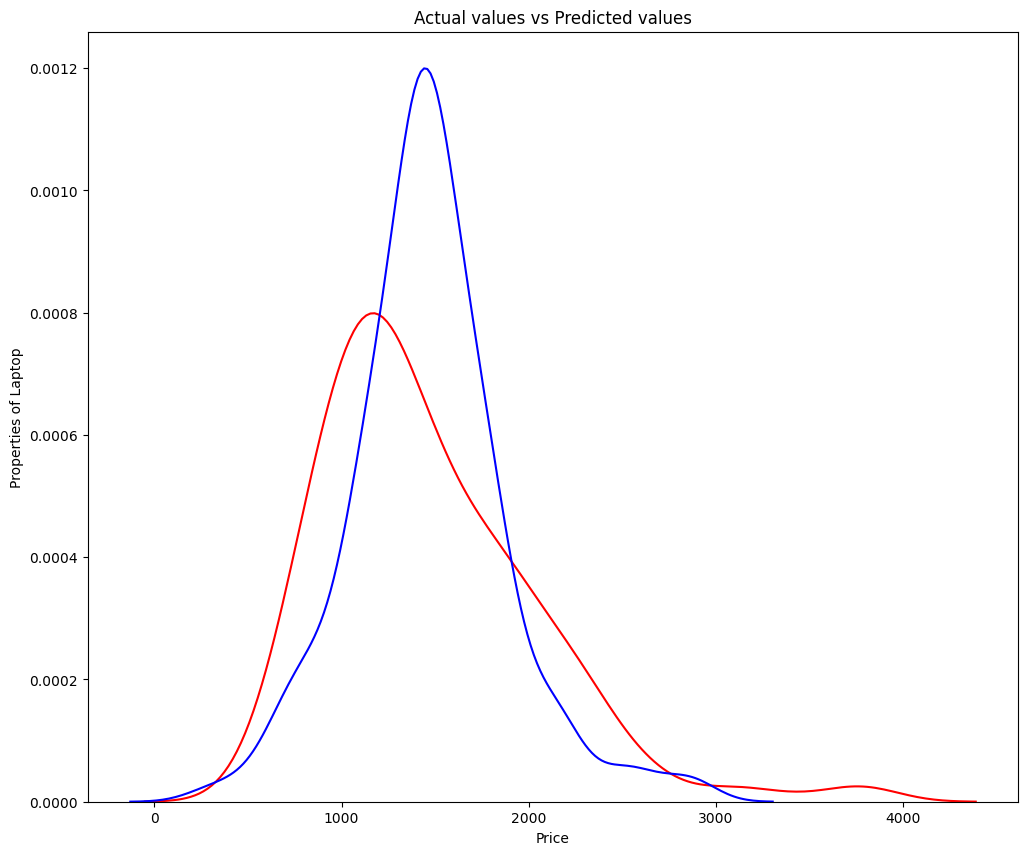

In [60]:
plt.figure(figsize = (width, height))
actual_plot = sns.distplot(df[["Price"]], hist = False, color =  "r", label = "Actual values")
sns.distplot(Yhat, hist = False, color = "b", label = "Predicted Values", ax = actual_plot)
plt.title("Actual values vs Predicted values")
plt.ylabel("Properties of Laptop")
plt.xlabel("Price")
plt.show()
plt.close()

In [64]:
lm1.fit(z,y)
print(" R- Squared Values for MLR is :", lm1.score(z,y))
Yhat = lm1.predict(z)
mse = mean_squared_error(y, Yhat)
print("Mean_Sqaured_Error for the MLR is:", mse)

 R- Squared Values for MLR is : 0.5082509055187374
Mean_Sqaured_Error for the MLR is: 161680.57263893107


In [71]:
# Ploynomial Regression 

x = df["CPU_frequency"]
y = df["Price"]
f1 = np.polyfit(x,y,1)
p1 = np.poly1d(f1)
print(p1)

f2 = np.polyfit(x,y,3)
p2 = np.poly1d(f2)
print(p2)

f3 = np.polyfit(x,y,5)
p3 = np.poly1d(f3)
print(p3)


 
1485 x + 253.7
           3             2
3.409e+04 x - 6.574e+04 x + 4.129e+04 x - 7238
           5            4             3             2
1.357e+06 x - 4.72e+06 x + 6.458e+06 x - 4.336e+06 x + 1.425e+06 x - 1.818e+05


In [76]:
def plotpolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variable, ".", x_new, y_new, "-")
    plt.title(f'finding ploynomial fit for Price: {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.7,0.7,0.7))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("Price of the laptops")
    plt.show()
    plt.close()

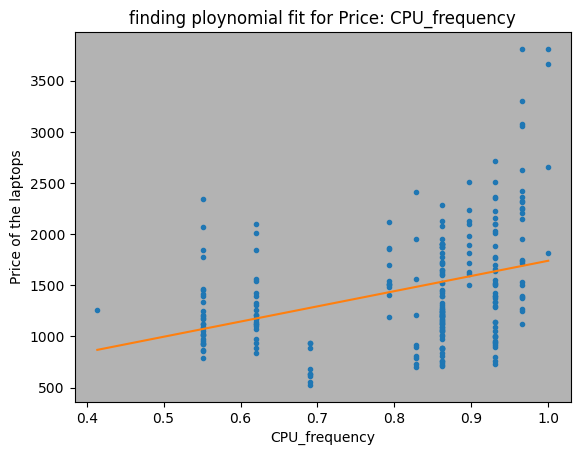

In [77]:
# call 1st degree model 

plotpolly(p1, x, y, "CPU_frequency")

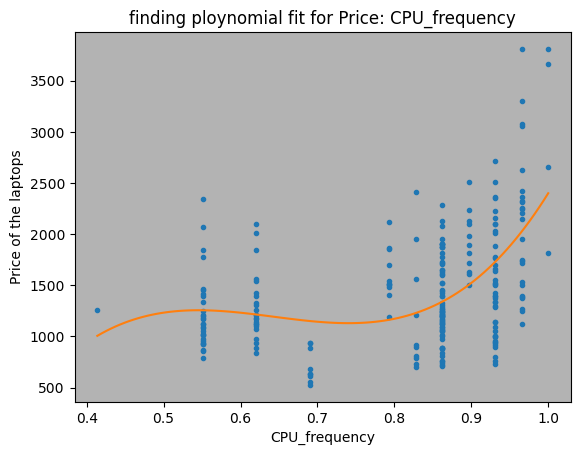

In [78]:
# 3rd degree

plotpolly(p2, x, y, "CPU_frequency")

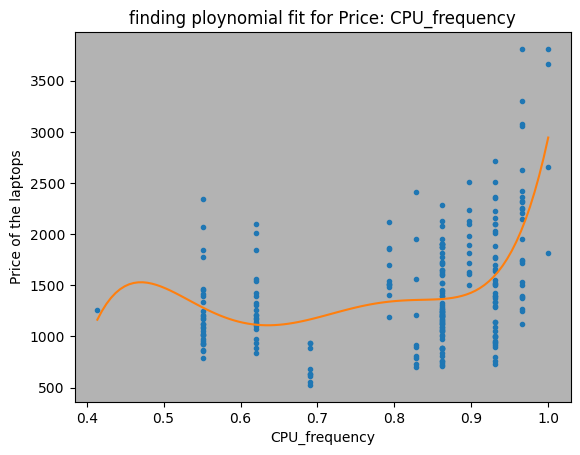

In [79]:
plotpolly(p3, x, y, "CPU_frequency")

In [88]:
# calculate R_Squared value, Mean Squared Value. for polynomial function to calculate r-Sqaured value use the function r2_score 
x = df["CPU_frequency"]
y = df["Price"]
print("Degree---->1")
print("R_Squared value for polynomial fit is:", r2_score(y, p1(x)))
print("Mean Squared Error value for Polynomial Regression is :", mean_squared_error(y, p1(x)),"\n")


print("Degree---->3")
print("R_Squared value for polynomial fit is:", r2_score(y, p2(x)))
print("Mean Squared Error value for Polynomial Regression is :", mean_squared_error(y, p2(x)),"\n")

print("Degree---->5")
print("R_Squared value for polynomial fit is:", r2_score(y, p3(x)))
print("Mean Squared Error value for Polynomial Regression is :", mean_squared_error(y, p3(x)),"\n")





Degree---->1
R_Squared value for polynomial fit is: 0.13444363210243282
Mean Squared Error value for Polynomial Regression is : 284583.4405868628 

Degree---->3
R_Squared value for polynomial fit is: 0.26692640796530986
Mean Squared Error value for Polynomial Regression is : 241024.8630384881 

Degree---->5
R_Squared value for polynomial fit is: 0.3030822706443803
Mean Squared Error value for Polynomial Regression is : 229137.29548053825 



In [112]:
# Pipeline

'''
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear 
regression. Use the set of multiple features as before to create this pipeline.
'''
from sklearn.pipeline import Pipeline
Input= [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(include_bias = False)), ("model", LinearRegression())]

pipe  = Pipeline(Input)
z = z.astype(float)
pipe.fit(z,y)
ypipe = pipe.predict(z)
ypipe[0:5]

array([2034., -112.,  924., 4368., 1250.])

In [111]:
# calculate Rsquared Value and Mean Squared Value
print("R_Squared Value for Pipeline is:", r2_score(y, ypipe))

print("Mean Squared Error for Pipeline is:", mean_squared_error(y,  ypipe))


R_Squared Value for Pipeline is: -3.3497634682412567
Mean Squared Error for Pipeline is: 1430144.4705882352
